In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews (1).csv


In [ ]:
df=pd.read_csv("fcc-forum-pageviews.csv", index_col='date',parse_dates=True)

low=df['value'].quantile(0.025)
high= df['value'].quantile(0.975)
df=df[(df['value']>=low) & (df['value']<=high)]

In [ ]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.tight_layout()
    return fig


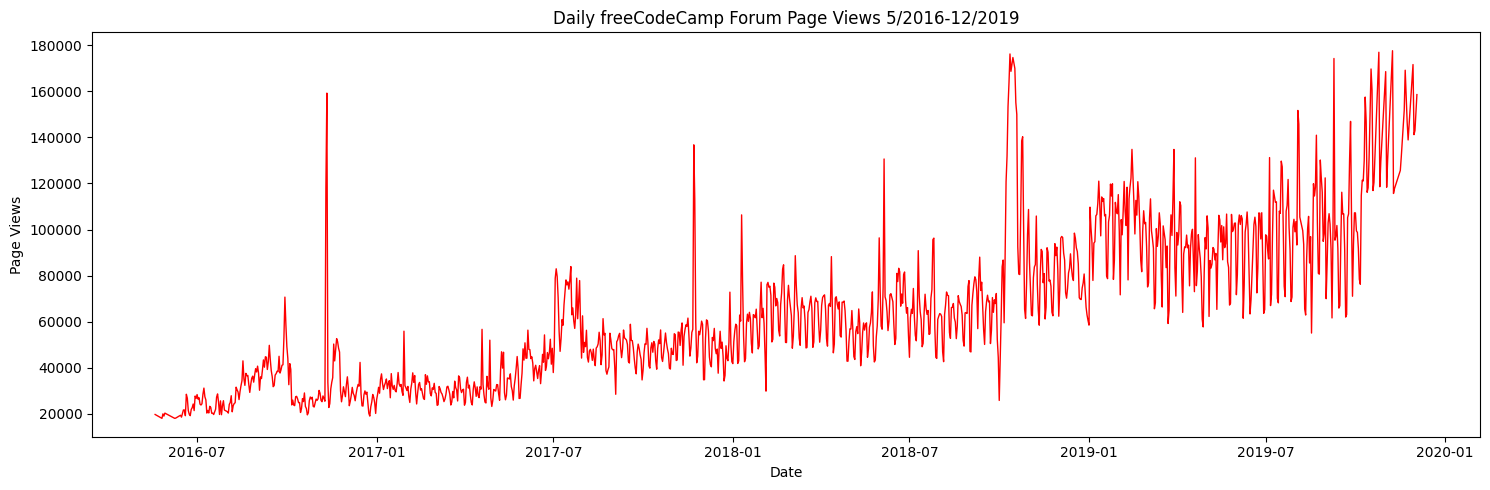

In [ ]:
fig = draw_line_plot()
plt.show()


In [ ]:
def draw_bar_plot():
  df_bar=df.copy()
  df_bar['year']=df_bar.index.year
  df_bar['month']=df_bar.index.month_name()
  df_grouped= df_bar.groupby(['year','month'])['value'].mean().unstack()

  month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

  df_grouped= df_grouped[month_order]
  fig= df_grouped.plot(kind='bar', figsize=(15,8)).figure
  plt.xlabel("years")
  plt.ylabel("Average page views")
  plt.legend(title='Months')
  plt.tight_layout()
  return fig


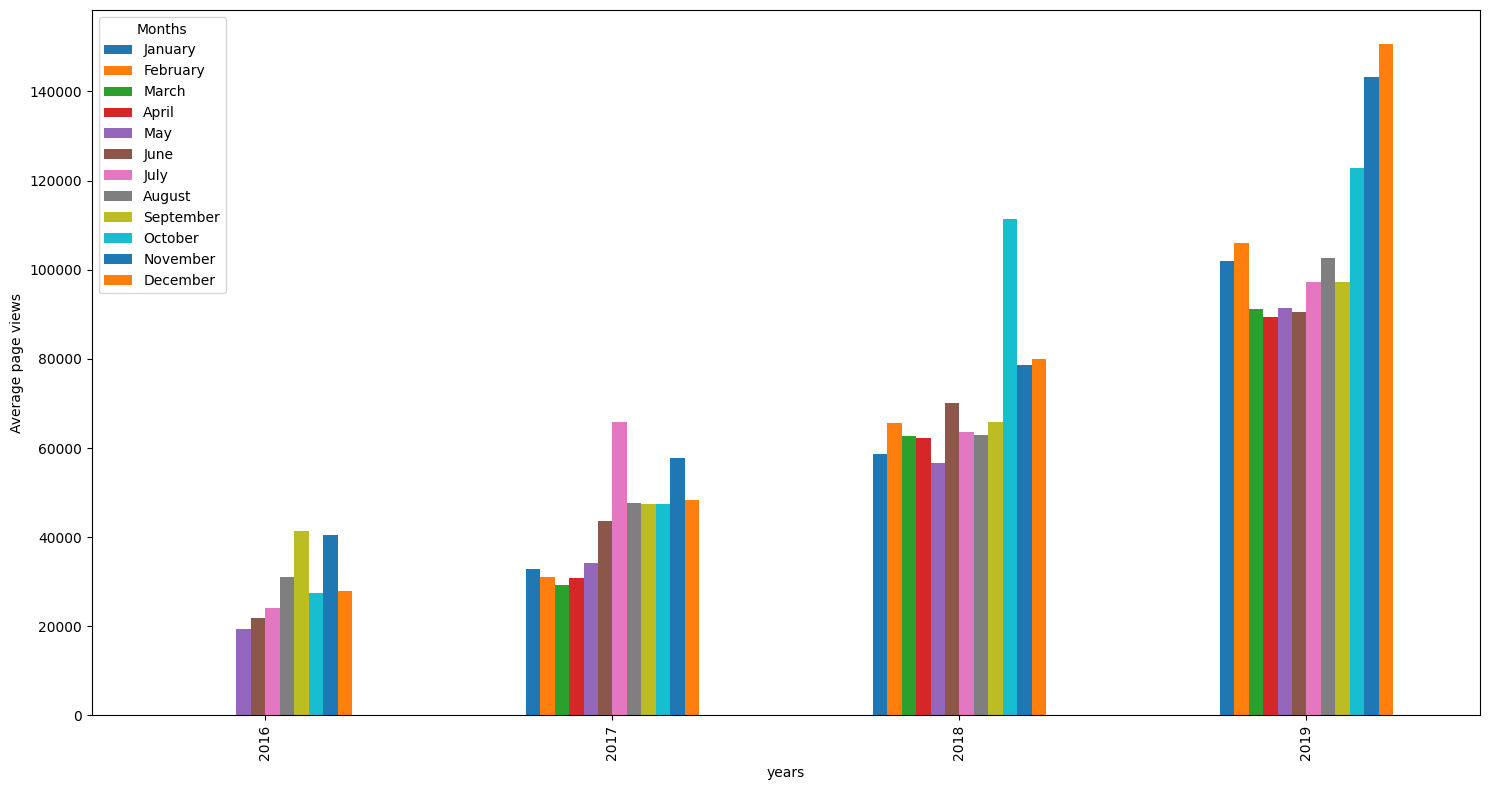

In [ ]:
fig = draw_bar_plot()
plt.show()

In [ ]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.tight_layout()
    return fig


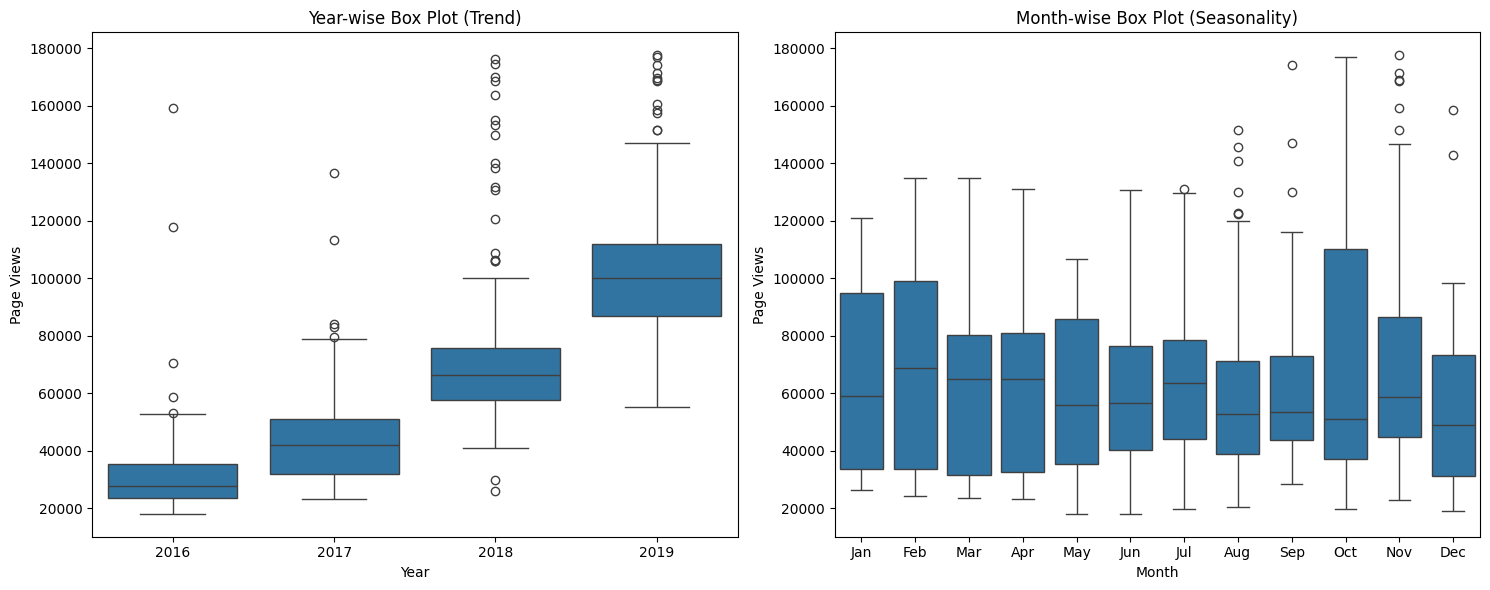

In [ ]:
fig =draw_box_plot()
plt.show()